In [ ]:
! pip install distance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 180.3/180.3 kB 9.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for distance: filename=Distance-0.1.3-py3-none-any.whl size=16257 sha256=2399bbfe6b326fdac04fb5a5f817ea74789af602759608b00c01b5ccdd6f2468
  Stored in directory: /root/.cache/pip/wheels/e8/bb/de/f71bf63559ea9a921059a5405806f7ff6ed612a9231c4a9309
Successfully built distance


In [ ]:
! pip install sacrebleu rouge_score

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.8/51.8 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.0/104.0 kB 9.5 MB/s eta 0:00:00
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24935 sha256=a52c95bd6bb29228b19cb1d0ead4c1b362569e1f7366171a719646065eff0421
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge_score


In [ ]:
! pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 527.3/527.3 kB 34.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 52.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 15.2 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 17.0.0 which is incompatible.
ibis-framework 8.0.0 requires pyarrow<16,>=2, but you have pyarrow 17.0.0 which is incompatible.


In [ ]:
! pip install pylev language_tool_python sentence_transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.1/227.1 kB 19.2 MB/s eta 0:00:00


In [ ]:
! pip install transformers torch pandas scikit-learn


In [ ]:
! pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 19.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.0/233.0 kB 23.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 8.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import json
import re
import matplotlib.pyplot as plt
import seaborn as sns
import distance
import pylev
from sentence_transformers import SentenceTransformer, util
import language_tool_python
import torch
from sklearn.model_selection import train_test_split
from transformers import T5Tokenizer, T5ForConditionalGeneration, Trainer, TrainingArguments
# import optuna
from transformers import T5Tokenizer, T5ForConditionalGeneration
from datasets import load_metric



/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


In [ ]:
with open('/content/train.json', 'r') as file:
    data = json.load(file)

In [ ]:
data_list = []

for key, value in data.items():
    data_list.append({
        'id': key,
        'original': value.get('original'),
        'disfluent': value.get('disfluent')
    })

# Convert the list of dictionaries to a DataFrame
df = pd.DataFrame(data_list)

# Display the DataFrame
print(df)

                            id  \
0     5a5918ff3e1742001a15cf7e   
1     5ad4f40c5b96ef001a10a774   
2     572684365951b619008f7543   
3     5729f799af94a219006aa70a   
4     5ad3b9cd604f3c001a3fee87   
...                        ...   
7177  57265d86f1498d1400e8dd53   
7178  5ad26aedd7d075001a429332   
7179  5ad402ae604f3c001a3ffd61   
7180  5ad4f1365b96ef001a10a70c   
7181  5ad405f0604f3c001a3ffe2f   

                                               original  \
0            What do unstable isotope studies indicate?   
1     What is the basic unit of territorial division...   
2               Which genus lack tentacles and sheaths?   
3     Long-lived memory cells can remember previous ...   
4     What led to Newcastle's rise to power as milit...   
...                                                 ...   
7177         What does the beroe do when pursuing prey?   
7178  A static equilibrium between three sources is ...   
7179                   When did Li Tan reject a revolt?   
7

# preprocessing

In [ ]:
def remove_emojis(text):
    emoji_pattern = re.compile(
        "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F700-\U0001F77F"  # alchemical symbols
        u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
        u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
        u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
        u"\U0001FA00-\U0001FA6F"  # Chess Symbols
        u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
        u"\U00002702-\U000027B0"  # Dingbats
        u"\U000024C2-\U0001F251"
        "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

df['disfluent'] = df['disfluent'].apply(remove_emojis)

In [ ]:
df[df['id']=='5a666b43846392001a1e1c11']

,id,original,disfluent
4192,5a666b43846392001a1e1c11,What happened to George Carlin after he sent t...,#VALUE!


In [ ]:
df = df[df['disfluent'] != 'VALUE!']


In [ ]:
import re
def clean_text(text):
    # Normalize to ASCII
    text = text.encode('ascii', 'ignore').decode('ascii')
    # Remove specific Unicode patterns
    text = re.sub(r'\\u[0-9A-Fa-f]{4}', '', text)
    # Remove non-alphanumeric characters (except spaces and punctuation)
    text = re.sub(r'[^a-zA-Z0-9\s.,!?]', '', text)
    return text

In [ ]:
df.dropna(inplace = True)

In [ ]:
df['disfluent'] = df['disfluent'].apply(clean_text)


In [ ]:
problematic_rows = df[(df['disfluent'].str.strip() == '') | (df['original'].str.strip() == '')]
print(problematic_rows)
df = df[(df['disfluent'].str.strip() != '') & (df['original'].str.strip() != '')]

                            id  \
687   572fad30a23a5019007fc86e   
6010  5729d36b1d04691400779609   

                                               original disfluent  
687   What campaigh did the Scottish National Party ...            
6010  How much was the combined wealth of the "10 Mi...            


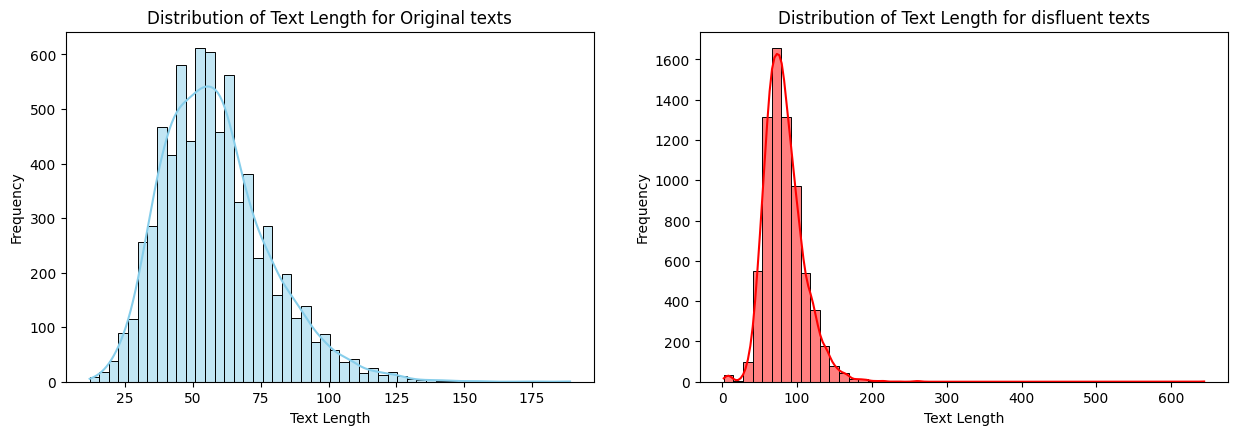

In [ ]:
plt.figure(figsize=(15 ,10))
plt.subplot(2,2,1)
sns.histplot(data=df, x=df['original'].astype('str').apply(len), bins=50, kde=True, color='skyblue')
plt.title('Distribution of Text Length for Original texts')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
# Text length distribution for question2
plt.subplot(2,2,2)
sns.histplot(data=df, x=df['disfluent'].astype('str').apply(len), bins=50, kde=True, color='red')
plt.title('Distribution of Text Length for disfluent texts')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

In [ ]:
df['text_length'] = df['disfluent'].apply(len)


In [ ]:
df['text_length_orignial'] = df['original'].apply(len)

In [ ]:
df.sort_values(by='text_length_orignial' , ascending=False)


,id,original,disfluent,text_length,text_length_orignial
2614,572753335951b619008f8854,"Whose role is to design the works, prepare the...",What role or rather make that whose role is de...,216,189
3711,5a89150d3b2508001a72a4ab,What is the application of prime numbers used ...,How or wait I mean what is the application of ...,193,174
3400,5729727baf94a219006aa43a,What is the application of prime numbers used ...,How is the or no make that what is the applica...,183,156
3747,5727526cdd62a815002e9b11,Focus on what is to ameliorate the many proble...,Focus on what is to ameliorate the many allian...,169,153
6776,57274e0d708984140094dbe6,"Even in large firms, architects, interior desi...","What types or uh even in large firms, architec...",168,151
...,...,...,...,...,...
3372,57332442d058e614000b5722,Who was Warsz?,What does er who was Warsz?,27,14
2540,5ad40b55604f3c001a3ffffb,What was hoho?,What was Kublai no hoho?,24,14
4604,572647e2dd62a815002e805c,What is NSFNET,Promoted research or instead first hat is NSFNET,48,14
6135,5726462b708984140094c117,What is CSNET,What is ARPANET sorry I mean CSNET,34,13


In [ ]:
print(df[df['id']=='5a6ce1054eec6b001a80a665']['disfluent'].values)
# too long

['QuestiontAnswer What is the dispensary subject to in a majority of countries?tpharmacy legislation What responsibilities were pharmacy technicians formerly limited to?twithin the dispensary compoundingdispensing medications What do pharmacy technicians depend on more and more?tautomation What are new responsibilities pharmacy technicians now deal with?tpatients prescriptions and patient safety issues ,t, What does pharmacy legislation mandate?tstorage conditions, compulsory texts, equipment, etc. What is the dispensary subject to in a minority of countries?tNOANSWER What do legislation no um pharmacy technicians depend on less and less?']


In [ ]:
def fetch_length_features(row):

    q1 = row['disfluent']
    q2 = row['original']

    length_features = [0.0]*3

    # Converting the Sentence into Tokens:
    q1_tokens = q1.split()
    q2_tokens = q2.split()

    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return length_features

    # Absolute length features
    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))

    #Average Token Length of both Questions
    length_features[1] = (len(q1_tokens) + len(q2_tokens))/2

    strs = list(distance.lcsubstrings(q1, q2))
    if len(strs) == 0:
       length_features[2] = 0
    else:
       length_features[2] = len(strs[0]) / (min(len(q1), len(q2)) + 1)

    return length_features

length_features = df.apply(fetch_length_features, axis=1)

df['abs_len_diff'] = list(map(lambda x: x[0], length_features))
df['mean_len'] = list(map(lambda x: x[1], length_features))
df['longest_substr_ratio'] = list(map(lambda x: x[2], length_features))

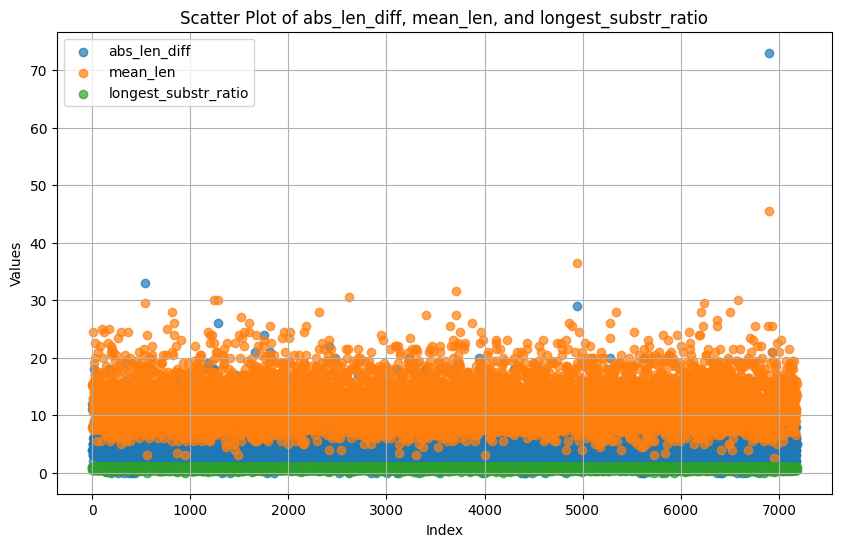

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df.index, df['abs_len_diff'], label='abs_len_diff', alpha=0.7)
plt.scatter(df.index, df['mean_len'], label='mean_len', alpha=0.7)
plt.scatter(df.index, df['longest_substr_ratio'], label='longest_substr_ratio', alpha=0.7)
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Scatter Plot of abs_len_diff, mean_len, and longest_substr_ratio')
plt.legend()
plt.grid(True)
plt.show()


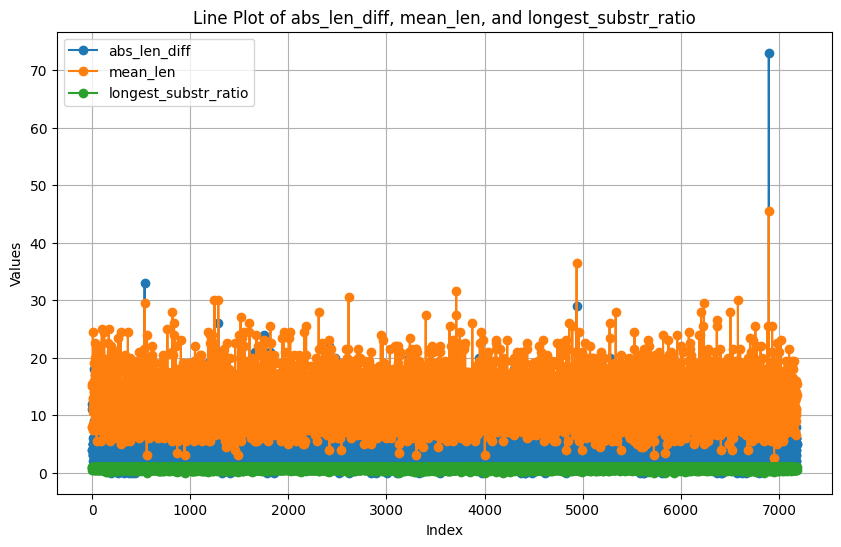

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(df['abs_len_diff'], label='abs_len_diff', marker='o')
plt.plot(df['mean_len'], label='mean_len', marker='o')
plt.plot(df['longest_substr_ratio'], label='longest_substr_ratio', marker='o')
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Line Plot of abs_len_diff, mean_len, and longest_substr_ratio')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:


# initializing LanguageTool and SentenceTransformer model
sen_model = SentenceTransformer('paraphrase-MiniLM-L3-v2')
tool = language_tool_python.LanguageTool('en-US')

def get_distance(src_txt, paraphrased_txt):
    """Returns levenschtein distance at word level between src_text and paraphrase"""
    return pylev.levenschtein(src_txt.split(), paraphrased_txt.split())

def get_similarity(src_txt, paraphrased_txt):
    """Returns cosine similarity between source and paraphrase sentence vectors"""
    src_txt_encoded = sen_model.encode(src_txt, convert_to_tensor=True)
    paraphrased_txt_encoded = sen_model.encode(paraphrased_txt, convert_to_tensor=True)
    return util.pytorch_cos_sim(src_txt_encoded , paraphrased_txt_encoded).item()

def get_num_grammatical_errors(paraphrased_txt):
    """Returns the number of errors calculated by LanguageTool"""
    return len(tool.check(paraphrased_txt))




/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/4.04k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/69.6M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/314 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

INFO:language_tool_python.download_lt:Unzipping /tmp/tmp_itzqugb.zip to /root/.cache/language_tool_python.
INFO:language_tool_python.download_lt:Downloaded https://www.languagetool.org/download/LanguageTool-6.4.zip to /root/.cache/language_tool_python.


In [ ]:
import pandas as pd

df['levenshtein_distance'] = df.apply(lambda row: get_distance(row['original'], row['disfluent']), axis=1)
df['cosine_similarity'] = df.apply(lambda row: get_similarity(row['original'], row['disfluent']), axis=1)
print(df.head())


                         id  \
0  5a5918ff3e1742001a15cf7e   
1  5ad4f40c5b96ef001a10a774   
2  572684365951b619008f7543   
3  5729f799af94a219006aa70a   
4  5ad3b9cd604f3c001a3fee87   

                                            original  \
0         What do unstable isotope studies indicate?   
1  What is the basic unit of territorial division...   
2            Which genus lack tentacles and sheaths?   
3  Long-lived memory cells can remember previous ...   
4  What led to Newcastle's rise to power as milit...   

                                           disfluent  text_length  \
0  What do petrologists no what do unstable isoto...           66   
1  What is the second level of territorial divisi...          121   
2  Juvenile platyctenids no wow Which genus lack ...           68   
3  When a pathogen is met again scratch that I me...          129   
4  What led to the Duke of Cumberlands rise to po...           90   

   text_length_orignial  abs_len_diff  mean_len  longest_subs

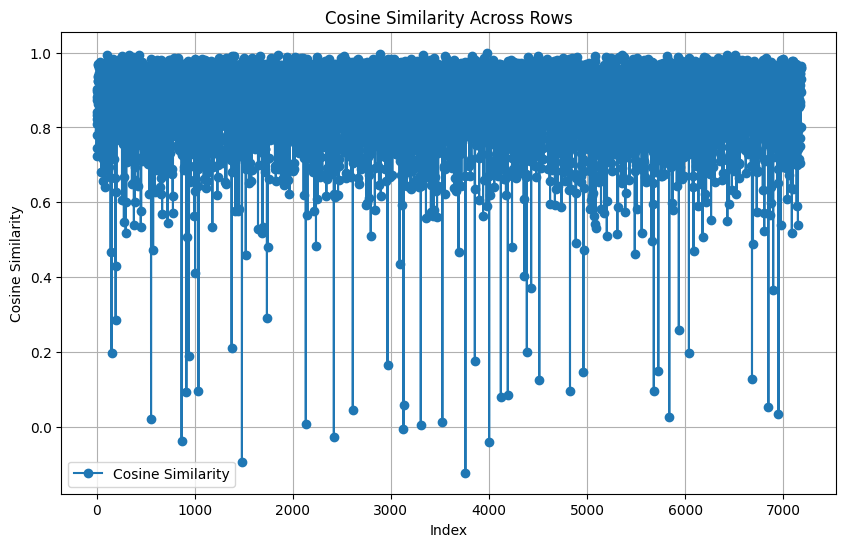

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(df['cosine_similarity'], label='Cosine Similarity', marker='o')
plt.xlabel('Index')
plt.ylabel('Cosine Similarity')
plt.title('Cosine Similarity Across Rows')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
df[df['cosine_similarity'] <= 0.1]

,id,original,disfluent,text_length,text_length_orignial,abs_len_diff,mean_len,longest_substr_ratio,levenshtein_distance,cosine_similarity
556,572634a789a1e219009ac56f,How is packet switching characterized,VALUE!,6,38,4,3.0,0.000000,5,0.019249
867,5726249538643c19005ad082,How are Air force messages delivered,VALUE!,6,37,5,3.5,0.142857,6,-0.038923
916,572ffd9e04bcaa1900d76fcb,"What interpretation of Islam is, for many of t...",Question na,11,98,14,9.0,0.416667,16,0.092154
1039,5acff55577cf76001a686620,"Who suggested that imperialism was the ""lowest...",question na,11,67,8,6.0,0.250000,10,0.094168
1482,57264228ec44d21400f3dcf8,Telnet Used what Interface technology,VALUE!,6,38,4,3.0,0.142857,5,-0.094907
2133,5726249538643c19005ad081,What 3 things does the Air Force work key on,VALUE!,6,45,9,5.5,0.142857,10,0.007251
2419,57263cfcec44d21400f3dc8f,What did the Apple system assign automatically,VALUE!,6,47,6,4.0,0.142857,7,-0.029264
2612,573382d24776f41900660c37,What is the city centre of Warsaw called in Po...,How do no wait where do IPCC reports get their...,59,51,1,10.5,0.076923,11,0.043800
3129,57302e45947a6a140053d232,What are colonial powers blamed for?,VALUE!,6,36,5,3.5,0.000000,6,-0.007245
3130,5a7b11bb21c2de001afe9d47,Are California Bungalows located in the north ...,VALUE!,6,54,8,5.0,0.142857,9,0.057094


In [ ]:
values_to_remove = ["Question na", "question na", "no question", "No question", "No question.", "Question NA", "na", "no question na", "VALUE!"]


In [ ]:
df = df[~df['disfluent'].isin(values_to_remove)]


In [ ]:
df[df['cosine_similarity'] <= 0.1]

,id,original,disfluent,text_length,text_length_orignial,abs_len_diff,mean_len,longest_substr_ratio,levenshtein_distance,cosine_similarity
2612,573382d24776f41900660c37,What is the city centre of Warsaw called in Po...,How do no wait where do IPCC reports get their...,59,51,1,10.5,0.076923,11,0.0438


# Train Test Split

In [ ]:
train_df, val_df = train_test_split(df, test_size=0.1, random_state=42)


# Text Dataset

In [ ]:

class TextDataset(torch.utils.data.Dataset):
    def __init__(self, dataframe, tokenizer, source_len, target_len, source_text, target_text):
        self.tokenizer = tokenizer
        self.data = dataframe
        self.source_len = source_len
        self.target_len = target_len
        self.source_text = source_text
        self.target_text = target_text

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        source_text = str(self.data[self.source_text].iloc[index]).strip()
        target_text = str(self.data[self.target_text].iloc[index]).strip()

        # Replace empty texts with a placeholder to avoid empty inputs
        if not source_text:
            source_text = "[EMPTY]"
        if not target_text:
            target_text = "[EMPTY]"

        # Tokenize the source and target texts
        source = self.tokenizer(
            source_text, max_length=self.source_len, padding='max_length', truncation=True, return_tensors="pt"
        )
        target = self.tokenizer(
            target_text, max_length=self.target_len, padding='max_length', truncation=True, return_tensors="pt"
        )

        # Squeeze the tensors to remove extra dimensions
        source_ids = source["input_ids"].squeeze()
        source_mask = source["attention_mask"].squeeze()
        target_ids = target["input_ids"].squeeze()

        # Labels are the target_ids shifted to the right, with padding on the left
        labels = target_ids.clone()
        labels[labels == self.tokenizer.pad_token_id] = -100  # Ignore padding tokens in the loss computation
        return {
            "input_ids": source_ids,
            "attention_mask": source_mask,
            "labels": labels,
        }



# Model One: T5

In [ ]:

# Set parameters
source_len = 262
target_len = 189

model_name = "t5-small"
tokenizer = T5Tokenizer.from_pretrained(model_name)
model = T5ForConditionalGeneration.from_pretrained(model_name)

tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

In [ ]:
# Create the datasets
train_dataset = TextDataset(train_df, tokenizer, source_len, target_len, "disfluent", "original")
val_dataset = TextDataset(val_df, tokenizer, source_len, target_len, "disfluent", "original")

In [ ]:
training_args = TrainingArguments(
    output_dir='./results',          # output directory
    num_train_epochs=3,              # number of training epochs
    per_device_train_batch_size=4,   # batch size for training
    per_device_eval_batch_size=4,
    warmup_steps=500,                # number of warmup steps for learning rate scheduler
    weight_decay=0.04,               # strength of weight decay
    logging_dir='./logs',            # directory for storing logs
    logging_steps=10,
    evaluation_strategy="epoch",
    learning_rate=6.602358273531259e-05,    # evaluate at the end of each epoch
)

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1494: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [ ]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset
)

trainer.train()
eval_result = trainer.evaluate()
print(eval_result)

Epoch,Training Loss,Validation Loss
1,0.175300,0.236482
2,0.167600,0.234517
3,0.210800,0.228425
4,0.151900,0.227566


{'eval_loss': 0.22756558656692505, 'eval_runtime': 7.6417, 'eval_samples_per_second': 93.565, 'eval_steps_per_second': 23.424, 'epoch': 4.0}


In [ ]:
def objective(trial):
    num_train_epochs = 4
    per_device_train_batch_size = 4
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-3)
    model = T5ForConditionalGeneration.from_pretrained('t5-small')
    tokenizer = T5Tokenizer.from_pretrained('t5-small')

    training_args = TrainingArguments(
        output_dir='./results',
        evaluation_strategy="epoch",
        learning_rate=learning_rate,
        per_device_train_batch_size=4,
        num_train_epochs=4,
        report_to="none"  # Do not log to any online service
    )

    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=train_dataset,
        eval_dataset=val_dataset
    )

    trainer.train()
    eval_result = trainer.evaluate()

    # You could return loss or any other metric like accuracy
    return eval_result["eval_loss"]

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=3)

print("Best trial:")
trial = study.best_trial
print(f"  Value: {trial.value}")
print("  Params: ")
for key, value in trial.params.items():
    print(f"    {key}: {value}")

[I 2024-09-01 00:52:14,932] A new study created in memory with name: no-name-7572beff-6aff-4a4f-afad-36b06c35b15c
<ipython-input-42-d7a42161563f>:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-3)
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1494: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss
1,0.529500,0.354222
2,0.406300,0.312684
3,0.365200,0.293603
4,0.344500,0.289359


[I 2024-09-01 01:08:36,056] Trial 0 finished with value: 0.28935882449150085 and parameters: {'learning_rate': 1.3441888686051018e-05}. Best is trial 0 with value: 0.28935882449150085.
<ipython-input-42-d7a42161563f>:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-3)
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1494: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss
1,0.502900,0.335623
2,0.386700,0.296770
3,0.346200,0.281408
4,0.325900,0.277674


[I 2024-09-01 01:24:52,169] Trial 1 finished with value: 0.27767351269721985 and parameters: {'learning_rate': 1.6205654032400217e-05}. Best is trial 1 with value: 0.27767351269721985.
<ipython-input-42-d7a42161563f>:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-3)
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1494: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss
1,0.378300,0.249081
2,0.282000,0.233048
3,0.237900,0.228146
4,0.215400,0.226710


[I 2024-09-01 01:41:11,420] Trial 2 finished with value: 0.22670979797840118 and parameters: {'learning_rate': 6.602358273531259e-05}. Best is trial 2 with value: 0.22670979797840118.


Best trial:
  Value: 0.22670979797840118
  Params: 
    learning_rate: 6.602358273531259e-05


In [ ]:
results = trainer.evaluate()
print(results)

In [ ]:
torch.cuda.empty_cache()

# Model 2: Bart

In [ ]:
from transformers import BartTokenizer, BartForConditionalGeneration
from transformers import BartTokenizer, BartForConditionalGeneration

tokenizer = BartTokenizer.from_pretrained('facebook/bart-base')
model = BartForConditionalGeneration.from_pretrained('facebook/bart-base')

train_dataset = TextDataset(train_df, tokenizer, source_len, target_len, "disfluent", "original")
val_dataset = TextDataset(val_df, tokenizer, source_len, target_len, "disfluent", "original")

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset
)

trainer.train()
results = trainer.evaluate()
print(results)

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.72k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/558M [00:00<?, ?B/s]

Epoch,Training Loss,Validation Loss
1,0.382200,0.294562
2,0.222500,0.255205
3,0.140800,0.250608
4,0.076700,0.269439


Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'early_stopping': True, 'num_beams': 4, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0, 'forced_eos_token_id': 2}
Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'early_stopping': True, 'num_beams': 4, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0, 'forced_eos_token_id': 2}
Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file

{'eval_loss': 0.269439160823822, 'eval_runtime': 15.5398, 'eval_samples_per_second': 46.011, 'eval_steps_per_second': 11.519, 'epoch': 4.0}


In [ ]:
torch.cuda.empty_cache()


# Model 3: Flan-T5

In [ ]:
source_len = 262
target_len = 189

tokenizer = T5Tokenizer.from_pretrained('google/flan-t5-base')
model = T5ForConditionalGeneration.from_pretrained('google/flan-t5-base')

train_dataset = TextDataset(train_df, tokenizer, source_len, target_len, "disfluent", "original")
val_dataset = TextDataset(val_df, tokenizer, source_len, target_len, "disfluent", "original")

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset
)

trainer.train()
results = trainer.evaluate()
print(results)
# too much parameters

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Epoch,Training Loss,Validation Loss
1,0.213400,0.178550
2,0.161400,0.169343
3,0.122500,0.178277


{'eval_loss': 0.17827652394771576, 'eval_runtime': 28.4012, 'eval_samples_per_second': 25.175, 'eval_steps_per_second': 6.303, 'epoch': 3.0}


In [ ]:
model_save_path = './finetuned_model'
tokenizer_save_path = './finetuned_tokenizer'
model.save_pretrained(model_save_path)
tokenizer.save_pretrained(tokenizer_save_path)

('./finetuned_tokenizer/tokenizer_config.json',
 './finetuned_tokenizer/special_tokens_map.json',
 './finetuned_tokenizer/spiece.model',
 './finetuned_tokenizer/added_tokens.json')

In [ ]:
trainer.save_model("./saved_model")
# Optionally, save the tokenizer associated with the model
tokenizer.save_pretrained("./saved_model")

('./saved_model/tokenizer_config.json',
 './saved_model/special_tokens_map.json',
 './saved_model/spiece.model',
 './saved_model/added_tokens.json')

In [ ]:
torch.save(model.state_dict(), 'model_weights.pth')


# Model 4: Pegasus

In [ ]:
# the results are not good
from transformers import PegasusTokenizer, PegasusForConditionalGeneration

tokenizer = PegasusTokenizer.from_pretrained('google/pegasus-xsum')
model = PegasusForConditionalGeneration.from_pretrained('google/pegasus-xsum')

# Model 5: GPT2

In [ ]:
from transformers import GPT2Tokenizer, GPT2LMHeadModel

tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
model = GPT2LMHeadModel.from_pretrained("gpt2")
# 1	6.147900	6.013670
# 2	5.467000	5.938045
# 3	5.430100	6.000732

# Validation Test

In [ ]:
with open('/content/dev.json', 'r') as file:
    data = json.load(file)

data_list = []

for key, value in data.items():
    data_list.append({
        'id': key,
        'original': value.get('original'),
        'disfluent': value.get('disfluent')
    })

# Convert the list of dictionaries to a DataFrame
test_df = pd.DataFrame(data_list)

# Display the DataFrame
print(test_df)

                           id  \
0    5a665142846392001a1e1ac0   
1    572821274b864d1900164514   
2    57300888b2c2fd1400568778   
3    5a55234d134fea001a0e1978   
4    5a25e8d5ef59cd001a623d16   
..                        ...   
995  572f5533a23a5019007fc55e   
996  5729f1283f37b319004785da   
997  57266193dd62a815002e832d   
998  573407d7d058e614000b6815   
999  5727c3b02ca10214002d95ba   

                                              original  \
0          What did the government want Thoreau to do?   
1         What makes the Wells Fargo Center stand out?   
2      What was the Colonia Agrippina's original name?   
3    Extended networking benefits helped those that...   
4    Who is the emphasis on when there is a private...   
..                                                 ...   
995               What river is larger than the Rhine?   
996  Compared to other causes, the effect of trade ...   
997  In the layered model of the Earth there are se...   
998       What British 

In [ ]:
test_dataset = TextDataset(test_df, tokenizer, source_len, target_len, "disfluent", "original")


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Ensure the model is in evaluation mode
model.eval()

# Storage for predictions and references
predictions = []
references = []

# Iterate over the test dataset
with torch.no_grad():
    for i in range(len(test_dataset)):
        # Get the batch from the dataset
        batch = test_dataset[i]

        # Move the inputs to the device
        input_ids = batch["input_ids"].unsqueeze(0).to(device)  # Add batch dimension
        attention_mask = batch["attention_mask"].unsqueeze(0).to(device)
        labels = batch["labels"].unsqueeze(0).to(device)
        # print(input_ids.shape)
        # print(attention_mask.shape)
        # Generate predictions
        outputs = model.generate(input_ids=input_ids, attention_mask=attention_mask, do_sample=True,
        top_k=120,
        top_p=0.98,
        early_stopping=True,
        num_return_sequences=4)
        # print(outputs.shape)

        # Convert predictions to text
        predicted_text = tokenizer.decode(outputs[0], skip_special_tokens=True)
        # print(predicted_text)
        # Truncate labels to match the length of generated outputs
        # max_len = outputs.shape[1]
        # truncated_label = labels[:, :max_len]
        # print(truncated_label.shape)
        labels = labels[labels != tokenizer.pad_token_id]
        reference_text = tokenizer.decode(labels[0], skip_special_tokens=True)

        # Store the results
        predictions.append(predicted_text)
        references.append(reference_text)


/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:588: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1249: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


In [ ]:
bleu_metric = load_metric("sacrebleu")
bleu_score = bleu_metric.compute(predictions=predictions[0:1000], references=[[ref] for ref in test_df['original']])
print(f"BLEU score: {bleu_score['score']}")

# ROUGE score
rouge_metric = load_metric("rouge")
rouge_score = rouge_metric.compute(predictions=predictions[0:1000], references=[[ref] for ref in test_df['original']])
print(f"ROUGE scores: {rouge_score}")

<ipython-input-30-90dc8dbe6f9e>:1: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  bleu_metric = load_metric("sacrebleu")


The repository for sacrebleu contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/sacrebleu.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y
BLEU score: 89.56288500760505


The repository for rouge contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/rouge.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y
ROUGE scores: {'rouge1': AggregateScore(low=Score(precision=0.9576711301545674, recall=0.9494713028670715, fmeasure=0.9515319078719987), mid=Score(precision=0.9644140585313379, recall=0.9568470039055371, fmeasure=0.9585135817780335), high=Score(precision=0.9706466945799298, recall=0.9634548813826348, fmeasure=0.9646134754491129)), 'rouge2': AggregateScore(low=Score(precision=0.9210410739607614, recall=0.913737106121482, fmeasure=0.9151135364335495), mid=Score(precision=0.9318163073038075, recall=0.9245287496097476, fmeasure=0.9259031868335867), high=Score(precision=0.941563687509386, recall=0.9343958814507031, fmeasure=0.9357418583654014)), 'rougeL': AggregateScore(low=Score(precision=0.9

In [ ]:
data = {
    "Metric": ["ROUGE-1", "ROUGE-2", "ROUGE-L", "ROUGE-Lsum"],
    "Precision (Low)": [0.9563850832582451, 0.9207875971046929, 0.9482591677236161, 0.9488951465731981],
    "Precision (Mid)": [0.9634595753511193, 0.9312826901040141, 0.956489980199539, 0.9562550689506573],
    "Precision (High)": [0.9698469573441261, 0.9407524085432545, 0.9633458308480735, 0.9635412124170767],
    "Recall (Low)": [0.9482289086519173, 0.913334536835049, 0.9407378847444047, 0.940577559700978],
    "Recall (Mid)": [0.9556441771568419, 0.9236264493228391, 0.9485305161102867, 0.9485541295334026],
    "Recall (High)": [0.9627608648141457, 0.93357493223175, 0.9562015657656662, 0.9565866999125048],
    "F-Measure (Low)": [0.9502156205528122, 0.9149868897834207, 0.9425571204609968, 0.9428194264941887],
    "F-Measure (Mid)": [0.9573298344355174, 0.9250906364574933, 0.9502651359735407, 0.9501684028194782],
    "F-Measure (High)": [0.9637706086057433, 0.934605584492704, 0.9574477065708317, 0.9578322904859957]
}

# Create DataFrame
df = pd.DataFrame(data)

# Set 'Metric' as the index (optional)
df.set_index('Metric', inplace=True)

df

,Precision (Low),Precision (Mid),Precision (High),Recall (Low),Recall (Mid),Recall (High),F-Measure (Low),F-Measure (Mid),F-Measure (High)
Metric,,,,,,,,,
ROUGE-1,0.956385,0.963460,0.969847,0.948229,0.955644,0.962761,0.950216,0.957330,0.963771
ROUGE-2,0.920788,0.931283,0.940752,0.913335,0.923626,0.933575,0.914987,0.925091,0.934606
ROUGE-L,0.948259,0.956490,0.963346,0.940738,0.948531,0.956202,0.942557,0.950265,0.957448
ROUGE-Lsum,0.948895,0.956255,0.963541,0.940578,0.948554,0.956587,0.942819,0.950168,0.957832


from matplotlib import pyplot as plt
_df_0['Precision (Low)'].plot(kind='hist', bins=20, title='Precision (Low)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Precision (Mid)'].plot(kind='hist', bins=20, title='Precision (Mid)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Precision (High)'].plot(kind='hist', bins=20, title='Precision (High)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Recall (Low)'].plot(kind='hist', bins=20, title='Recall (Low)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Precision (Low)', y='Precision (Mid)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Precision (Mid)', y='Precision (High)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Precision (High)', y='Recall (Low)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Recall (Low)', y='Recall (Mid)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['Precision (Low)'].plot(kind='line', figsize=(8, 4), title='Precision (Low)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['Precision (Mid)'].plot(kind='line', figsize=(8, 4), title='Precision (Mid)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['Precision (High)'].plot(kind='line', figsize=(8, 4), title='Precision (High)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['Recall (Low)'].plot(kind='line', figsize=(8, 4), title='Recall (Low)')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
import pandas as pd

# Define data for DataFrame
data = {
    "Metric": ["ROUGE-1", "ROUGE-2", "ROUGE-L", "ROUGE-Lsum"],
    "Precision (Low)": [0.9563850832582451, 0.9207875971046929, 0.9482591677236161, 0.9488951465731981],
    "Precision (Mid)": [0.9634595753511193, 0.9312826901040141, 0.956489980199539, 0.9562550689506573],
    "Precision (High)": [0.9698469573441261, 0.9407524085432545, 0.9633458308480735, 0.9635412124170767],
    "Recall (Low)": [0.9482289086519173, 0.913334536835049, 0.9407378847444047, 0.940577559700978],
    "Recall (Mid)": [0.9556441771568419, 0.9236264493228391, 0.9485305161102867, 0.9485541295334026],
    "Recall (High)": [0.9627608648141457, 0.93357493223175, 0.9562015657656662, 0.9565866999125048],
    "F-Measure (Low)": [0.9502156205528122, 0.9149868897834207, 0.9425571204609968, 0.9428194264941887],
    "F-Measure (Mid)": [0.9573298344355174, 0.9250906364574933, 0.9502651359735407, 0.9501684028194782],
    "F-Measure (High)": [0.9637706086057433, 0.934605584492704, 0.9574477065708317, 0.9578322904859957]
}

# Create DataFrame
df = pd.DataFrame(data)

# Set 'Metric' as the index (optional)
df.set_index('Metric', inplace=True)

# Display the DataFrame in a more visually appealing format using IPython.display
from IPython.display import display
display(df)


,Precision (Low),Precision (Mid),Precision (High),Recall (Low),Recall (Mid),Recall (High),F-Measure (Low),F-Measure (Mid),F-Measure (High)
Metric,,,,,,,,,
ROUGE-1,0.956385,0.963460,0.969847,0.948229,0.955644,0.962761,0.950216,0.957330,0.963771
ROUGE-2,0.920788,0.931283,0.940752,0.913335,0.923626,0.933575,0.914987,0.925091,0.934606
ROUGE-L,0.948259,0.956490,0.963346,0.940738,0.948531,0.956202,0.942557,0.950265,0.957448
ROUGE-Lsum,0.948895,0.956255,0.963541,0.940578,0.948554,0.956587,0.942819,0.950168,0.957832
